In [1]:
!python3 --version

Python 3.7.5


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage import io
from scipy import ndimage

In [3]:
input_path = "./images"
output_path = "./output"

image = None

if not os.path.exists(output_path):
    os.mkdir(output_path)

for obj in os.listdir(input_path):
    image = io.imread(os.path.join(input_path, obj))

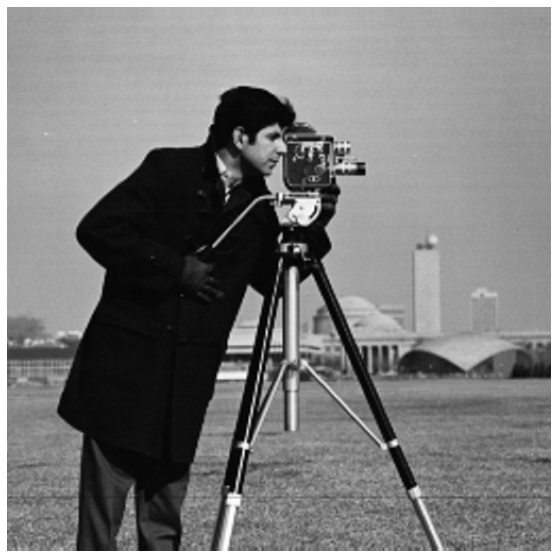

In [4]:
plt.figure(figsize = (10, 10))
plt.imshow(image, cmap = 'gray')
plt.axis("off")
plt.show()

In [5]:
def normalize(image):
    """normalize the pixels from the input image to range [0-255]

    Parameters:
        image (array): image to be normalized 

    Returns:
        image (array): normalized image
    """
    return (255*(image - image.min()) / (image.max() - image.min())).astype("uint8")

In [6]:
def plot_and_save(image, name, normalize_img = True):
    """plot and save an image given the input

    Parameters:
        image (array): image to be plotted and saved
        name (string): name to the saved 
        normalize_img (boolean): indicates if the image is normalized before  plot

    Returns:
        
    """
    plt.figure(figsize = (10, 10))
    plt.xticks([]), plt.yticks([])
    plt.imshow(normalize(image) if normalize_img else image, cmap = 'gray')
    plt.savefig(os.path.join(output_path, name), cmap = 'gray', bbox_inches='tight', pad_inches = 0)

In [7]:
def convolution(image, weights, verbose = True):
    """perform the convolution operation between an image and a given filter

    Parameters:
        image (array): image to be plotted and saved
        weights (array): filter to be used in convolution operation 
        verbose (boolean): indicates if the original and after convolution are displayed 

    Returns:
        image (array): image after convolution operation performed
    """
    output = ndimage.filters.convolve(image, weights)
    if verbose:
        plt.figure(figsize = (10, 10))
        plt.subplot(121),plt.imshow(image, cmap = 'gray'),plt.title('Original')
        plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(output,cmap = 'gray'),plt.title('Kernelized')
        plt.xticks([]), plt.yticks([])
    return output


## Aplicação do primeiro filtro

$h_{1} = \begin{bmatrix}
  0 & 0 & -1 & 0 & 0 \\ 
  0 & -1 & -2 & -1 & 0\\ 
  -1 & -2 & 16 & -2 & -1\\ 
  0 & -1 & -2 & -1 & 0 \\ 
  0 & 0 & -1 & 0 & 0 \\ 
\end{bmatrix}$

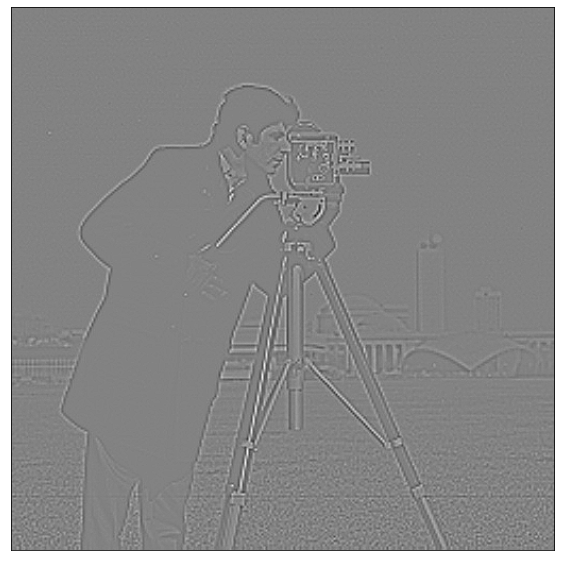

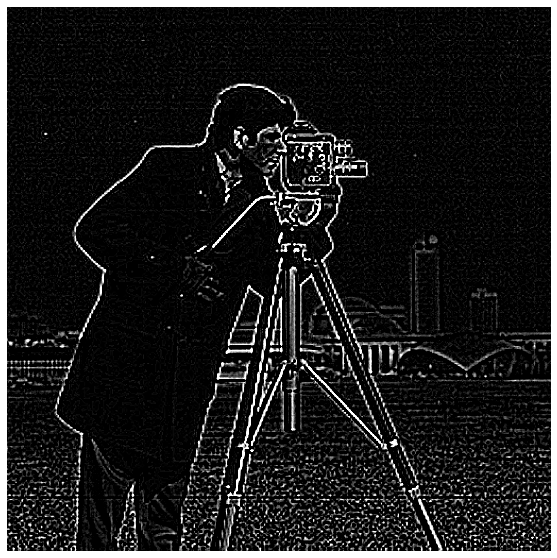

In [8]:
h1 =  np.array([[0,0,-1, 0, 0], 
               [0,-1,-2, -1, 0],
               [-1, -2, 16, -2, -1],
               [0, -1, -2, -1, 0],
               [0, 0, -1, 0, 0]])

img_h1 = convolution(image.copy().astype("int"), h1, verbose = False)
plot_and_save(img_h1, "image_h1")


plt.figure(figsize = (10, 10))
plt.imshow(img_h1, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis("off")
plt.savefig(os.path.join(output_path, "img_h1_bordas"), cmap = 'gray', bbox_inches='tight', pad_inches = 0)

## Aplicação do segundo filtro

$h_{2} = \frac{1}{256}\begin{bmatrix}
          1 & 4 & 6 & 4 & 1 \\ 
          4 & 16 & 24 & 16 & 4\\ 
          6 & 24 & 36 & 24 & 6\\ 
          4 & 16 & 24 & 16 & 4 \\ 
          1 & 4 & 6 & 4 & 1 \\ 
\end{bmatrix}$

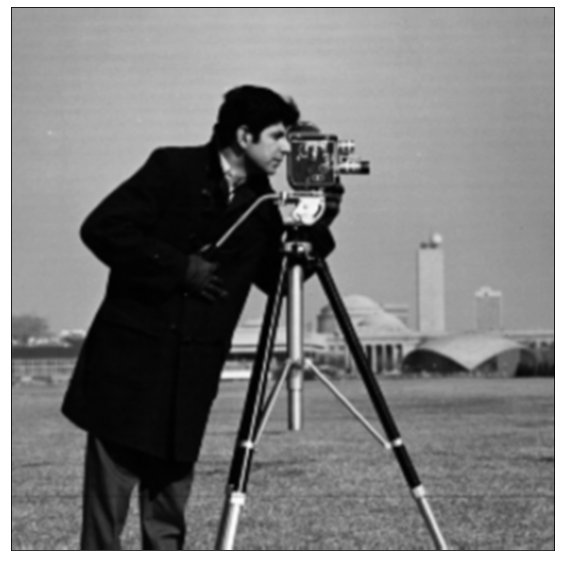

In [9]:
h2 =  np.array([[1, 4, 6, 4, 1], 
               [4, 16, 24, 16, 4],
               [6, 24, 36, 24, 6],
               [4, 16, 24, 16, 4],
               [1, 4, 6, 4, 1]])/256.

img_h2 = convolution(image.copy().astype("int"), h2, verbose = False)
plot_and_save(img_h2, "image_h2")

## Aplicação do terceiro filtro

$
h_{3} = \begin{bmatrix}
          -1 & 0 & 1 \\ 
          -2 & 0 & 2 \\ 
          -1 & 0 & 1
\end{bmatrix}
$

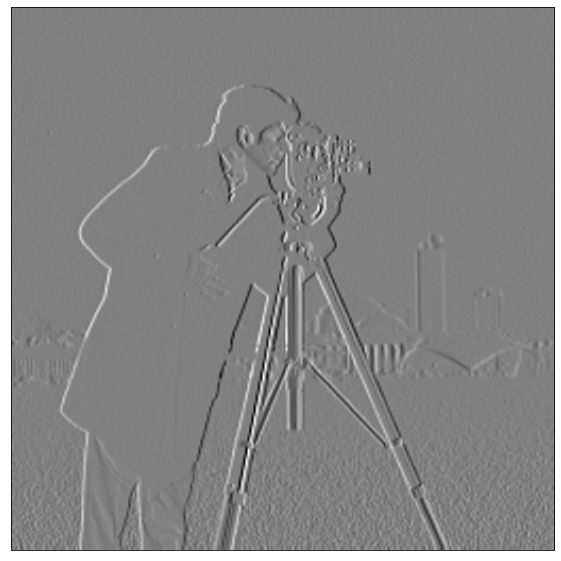

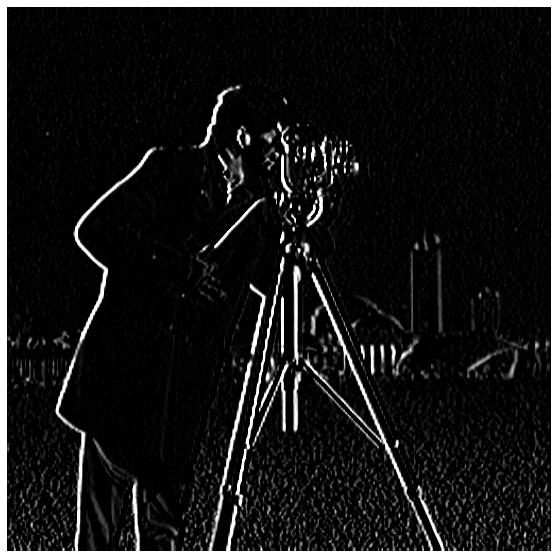

In [10]:
h3 =  np.array([[-1 ,0,1], 
               [-2,0, 2],
               [-1, 0, 1]])

img_h3 =  convolution(image.copy().astype("int"), h3, verbose = False)
plot_and_save(img_h3, "image_h3", normalize_img = True)

plt.figure(figsize = (10, 10))
plt.imshow(img_h3, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis("off")
plt.savefig(os.path.join(output_path, "img_h3_bordas"), cmap = 'gray', bbox_inches='tight', pad_inches = 0)

## Aplicação do quarto filtro

$h_{4} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$

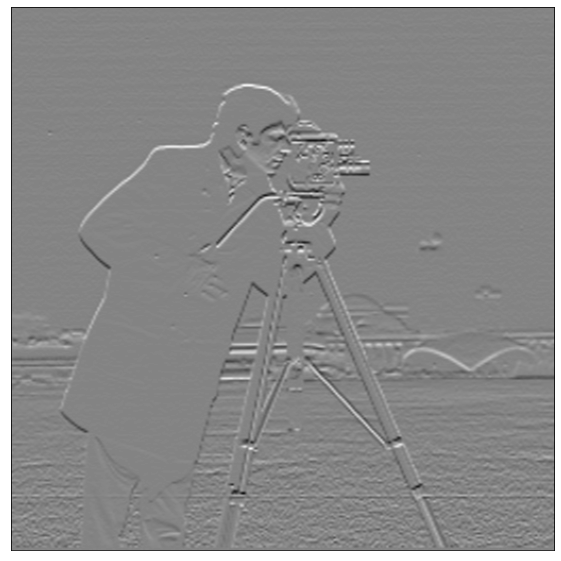

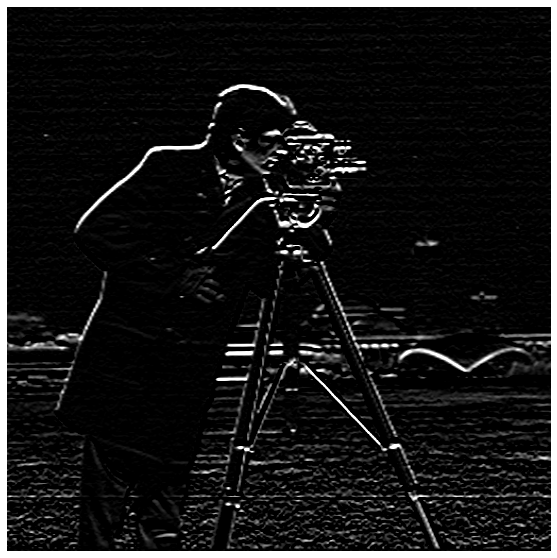

In [11]:
h4 =  np.array([[-1 ,-2, -1], 
               [0, 0, 0],
               [1, 2, 1]])

img_h4 =  convolution(image.copy().astype("int"), h4, verbose = False)
plot_and_save(img_h4, "image_h4")

plt.figure(figsize = (10, 10))
plt.imshow(img_h4, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis("off")
plt.savefig(os.path.join(output_path, "img_h4_bordas"), cmap = 'gray', bbox_inches='tight', pad_inches = 0)

## Combinação entre as respostas do terceiro e quarto filtro

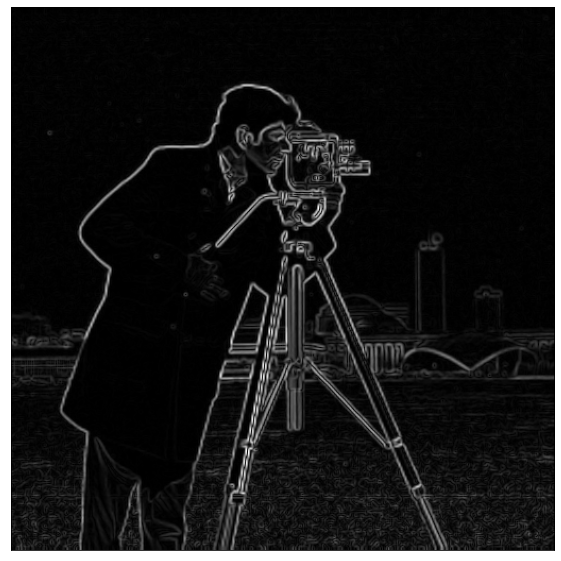

In [12]:
img_h10 = np.sqrt(np.square(img_h3) + np.square(img_h4))
plot_and_save(img_h10, "image_h10")

## Aplicação do quinto filtro

$h_{5} = \begin{bmatrix}
          -1 & -1 & -1 \\ 
          -1 & 8 & -1 \\ 
          -1 & -1 & -1
\end{bmatrix}$

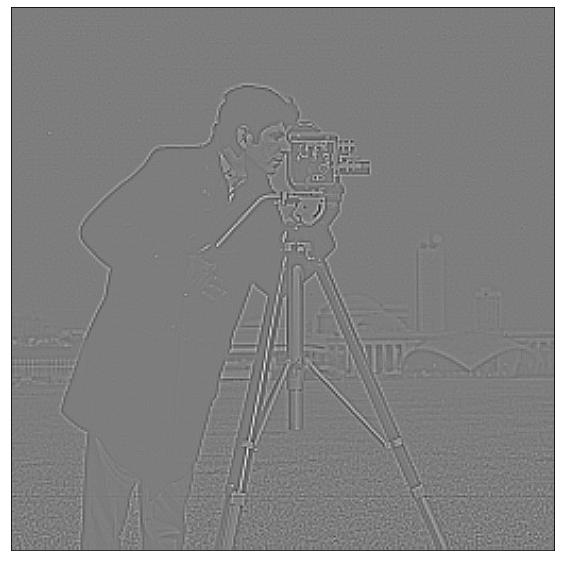

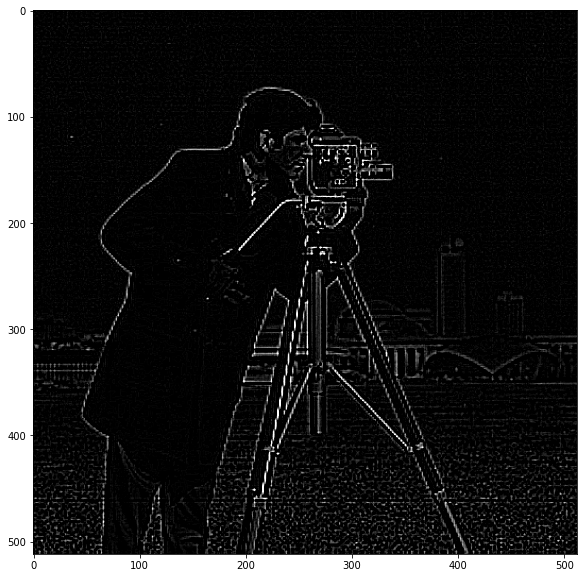

In [13]:
h5 =  np.array([[-1 ,-1, -1], 
               [-1, 8, -1],
               [-1, -1, -1]])

img_h5 = convolution(image.copy().astype("int"), h5, verbose = False)
plot_and_save(img_h5, "image_h5")

plt.figure(figsize = (10, 10))
plt.imshow(img_h5, cmap = 'gray', vmin = 0, vmax = 255)

## Aplicação do sexto filtro

$h_{6} = \frac{1}{9}\begin{bmatrix}
          1 & 1 & 1 \\ 
          1 & 1 & 1 \\ 
          1 & 1 & 1
\end{bmatrix}$

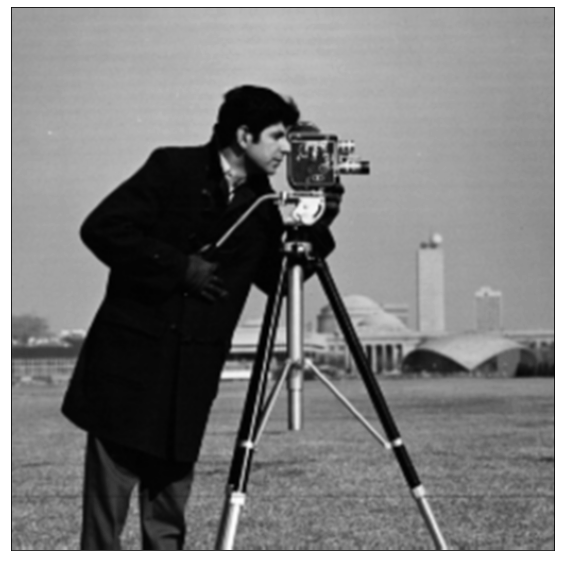

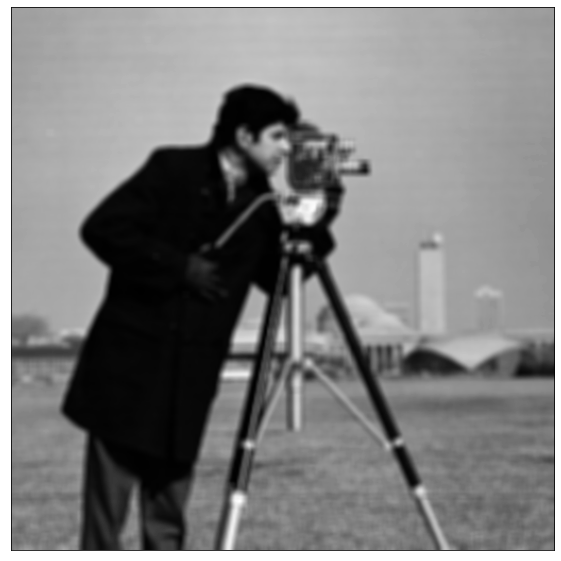

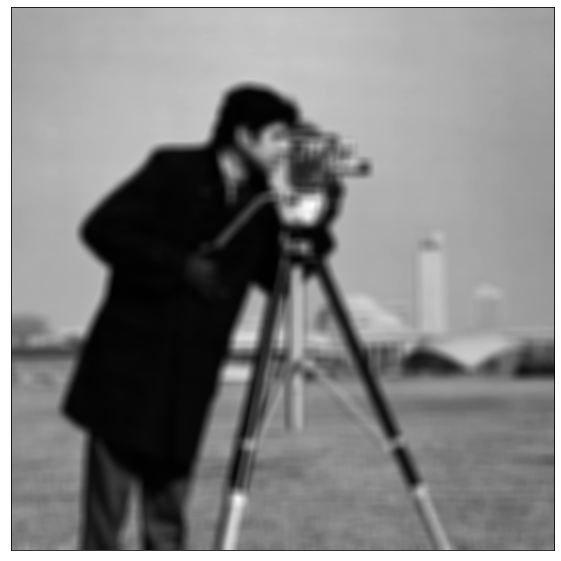

In [14]:
h6 =  np.array([[1 ,1, 1], 
               [1, 1, 1],
               [1, 1, 1]])/9

img_h6 = convolution(image.copy().astype("int"), h6, verbose = False)
plot_and_save(img_h6, "image_h6")

img_h6_7 = convolution(image.copy().astype("int"), np.ones((7, 7))/49, verbose = False)
plot_and_save(img_h6_7, "image_h6_7")

img_h6_11 = convolution(image.copy().astype("int"), np.ones((11, 11))/121, verbose = False)
plot_and_save(img_h6_11, "image_h6_11")

## Aplicação do sétimo filtro

$
    h_{7} = \begin{bmatrix}
          -1 & -1 & 2 \\ 
          -1 & 2 & -1 \\ 
          2 & -1 & -1
\end{bmatrix}$

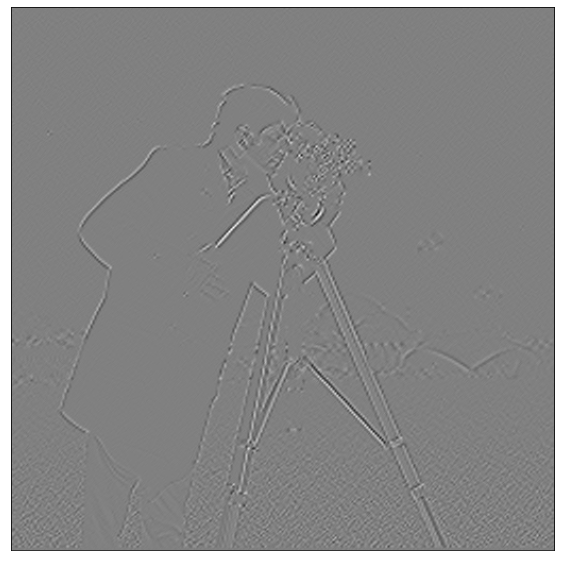

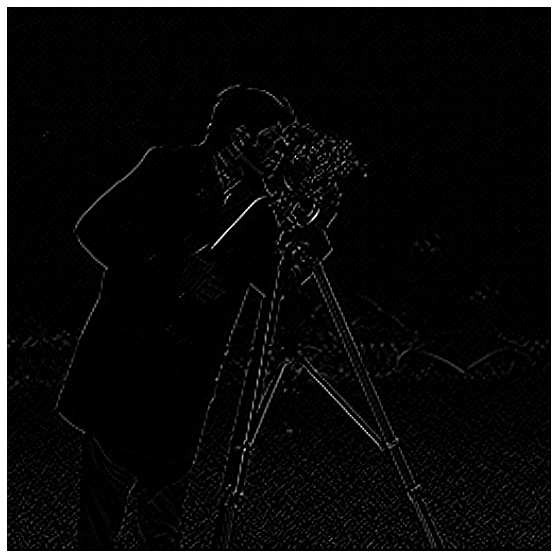

In [15]:
h7 =  np.array([[-1, -1, 2], 
               [-1, 2, -1],
               [2, -1, -1]])

img_h7 = convolution(image.copy().astype("int"), h7,verbose = False)
plot_and_save(img_h7, "image_h7")

plt.figure(figsize = (10, 10))
plt.imshow(img_h7, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis("off")
plt.savefig(os.path.join(output_path, "img_h7_bordas"), cmap = 'gray', bbox_inches='tight', pad_inches = 0)

## Aplicação do oitavo filtro

$
h_{8} = \begin{bmatrix}
          2 & -1 & -1 \\ 
          -1 & 2 & -1 \\ 
          -1 & -1 & 2
\end{bmatrix}
$

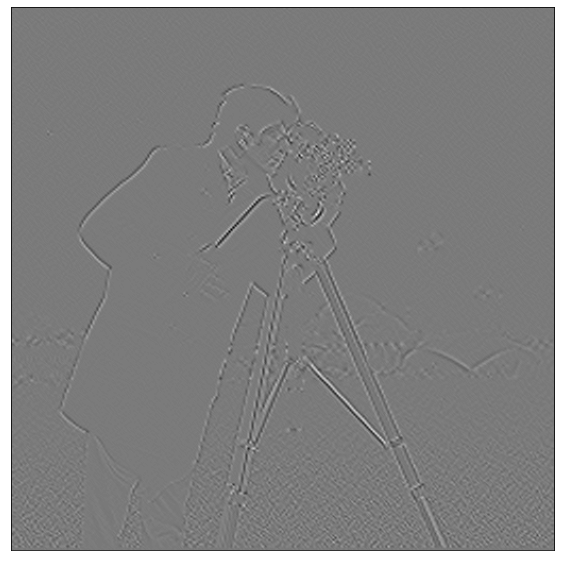

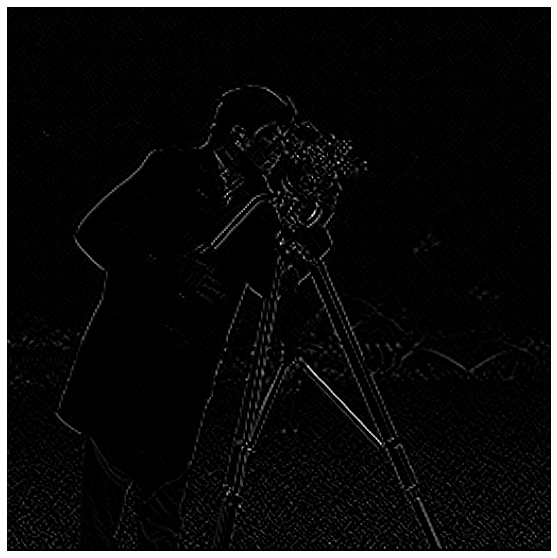

In [16]:
h8 =  np.array([[2 ,-1, -1], 
               [-1, 2, -1],
               [-1, -1, 2]])

img_h8 = convolution(image.copy().astype("int"), h8, verbose = False)
plot_and_save(img_h8, "image_h8")

plt.figure(figsize = (10, 10))
plt.imshow(img_h8, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis("off")
plt.savefig(os.path.join(output_path, "img_h8_bordas"), cmap = 'gray', bbox_inches='tight', pad_inches = 0)

## Executando alguns testes para entender melhor a resposta de alguns filtros

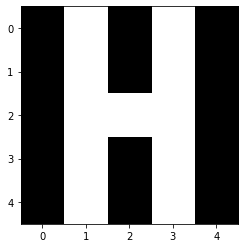

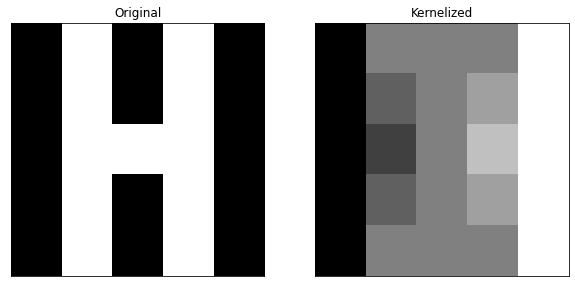

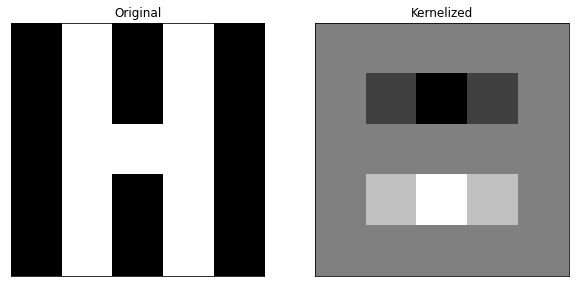

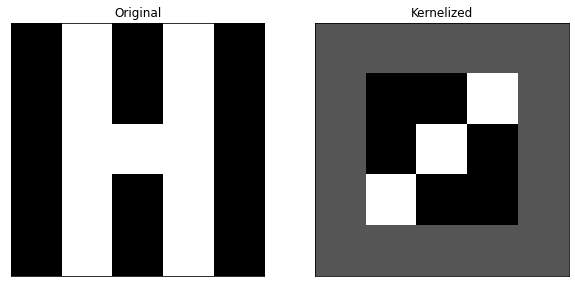

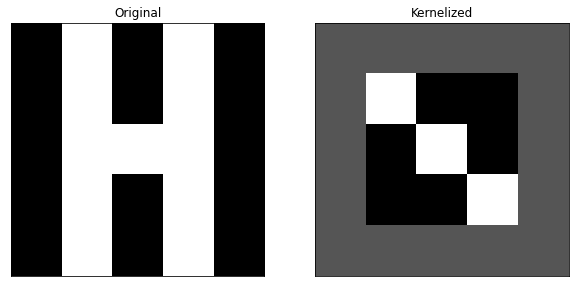

In [17]:
teste = np.array([[0, 1, 0, 1, 0], 
                [0, 1, 0, 1, 0], 
                [0, 1, 1, 1, 0], 
                [0, 1, 0, 1, 0], 
                [0, 1, 0, 1, 0]])


plt.imshow(teste, cmap = 'gray')

plt.imshow(convolution(teste, h3), cmap = 'gray')

plt.imshow(convolution(teste, h4), cmap = 'gray')

plt.imshow(convolution(teste, h7), cmap = 'gray')

plt.imshow(convolution(teste, h8), cmap = 'gray')

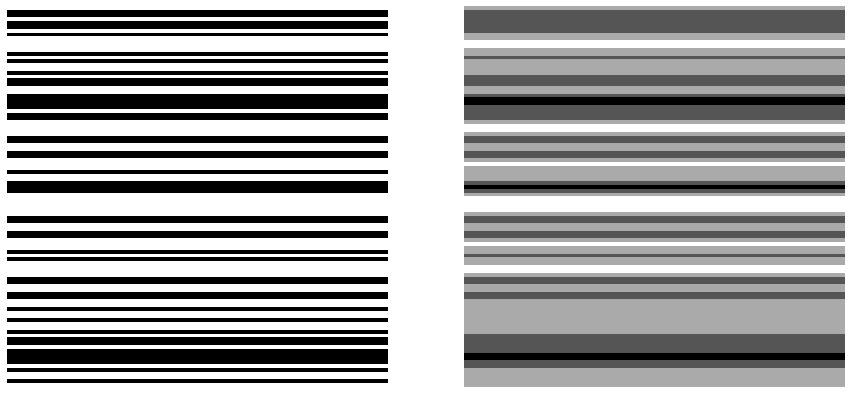

In [18]:
uns = 255*np.ones((100, 100))
idxs = np.random.randint(100, size=(30,2))
uns[idxs] = 0


img_exp =  convolution(uns.copy().astype("int"), h6, verbose = False)
plt.figure(figsize = (15, 15))
plt.subplot(121), plt.axis("off")
plt.imshow(uns, cmap = 'gray')
plt.subplot(122), plt.axis("off")
plt.imshow(img_exp, cmap = 'gray')
plt.savefig("./output/teste", cmap = 'gray', bbox_inches='tight', pad_inches = 0)